In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import os

# Path to the raw data
data_path = "../data/raw/Ni-0.0_Xx3-1.0-First-Principles-Temperature-Dependent-Electronic-Phonon-Properties.txt"
# Column names from the dataset
cols = ["T_e", "Volume", "E_F", "N_Ef", "gamma", "C_e", "v_F", "tau_e", "k_e", "k_lat", "lambda", "Log10_Ge"]
# Load data, skipping lines starting with '#'
df = pd.read_csv(data_path, sep="\s+", comment='#', names=cols)

print(f"Dataset loaded with {df.shape[0]} rows.")
df.head()

Dataset loaded with 22 rows.


,T_e,Volume,E_F,N_Ef,γ,C_e,v_F,tau_e,k_e,k_lat,λ,Log10_Ge
0,100,70.31,21.767,1.793,0.789,5.111915,2.259,17.954,0.016995,1.092123,2.0313,-5.715853
1,200,70.37,21.767,1.793,0.775,10.215553,2.366,11.186,0.030817,0.565002,1.6301,-9.508770
2,300,70.44,21.767,1.793,0.768,15.308729,2.344,8.222,0.037537,0.382971,1.4785,-13.249634
3,400,70.51,21.767,1.793,0.763,20.391497,2.350,6.371,0.040448,0.290914,1.4311,-16.961105
4,500,70.58,21.767,1.793,0.757,25.464248,2.350,5.168,0.041660,0.235748,1.4113,-20.664283


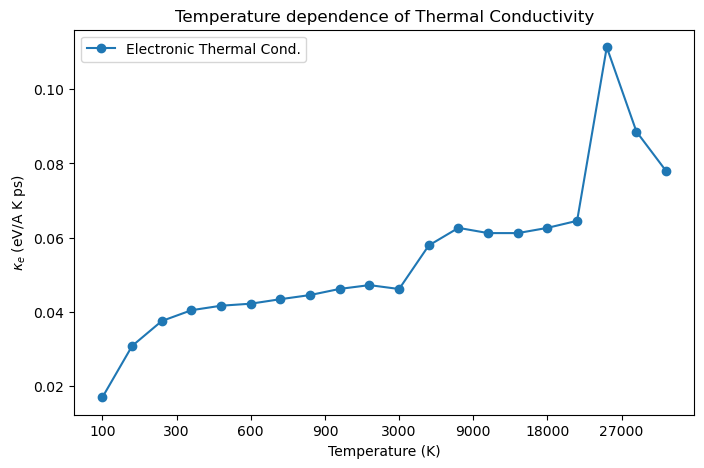

In [13]:
plt.figure(figsize=(8, 5))
plt.plot(df['T_e'], df['k_e'], marker='o', label='Electronic Thermal Cond.')
plt.xlabel('Temperature (K)')
plt.ylabel('$\kappa_e$ (eV/A K ps)')
plt.title('Temperature dependence of Thermal Conductivity')
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=10)) # Max 10 ticks on X
plt.legend()
plt.show()

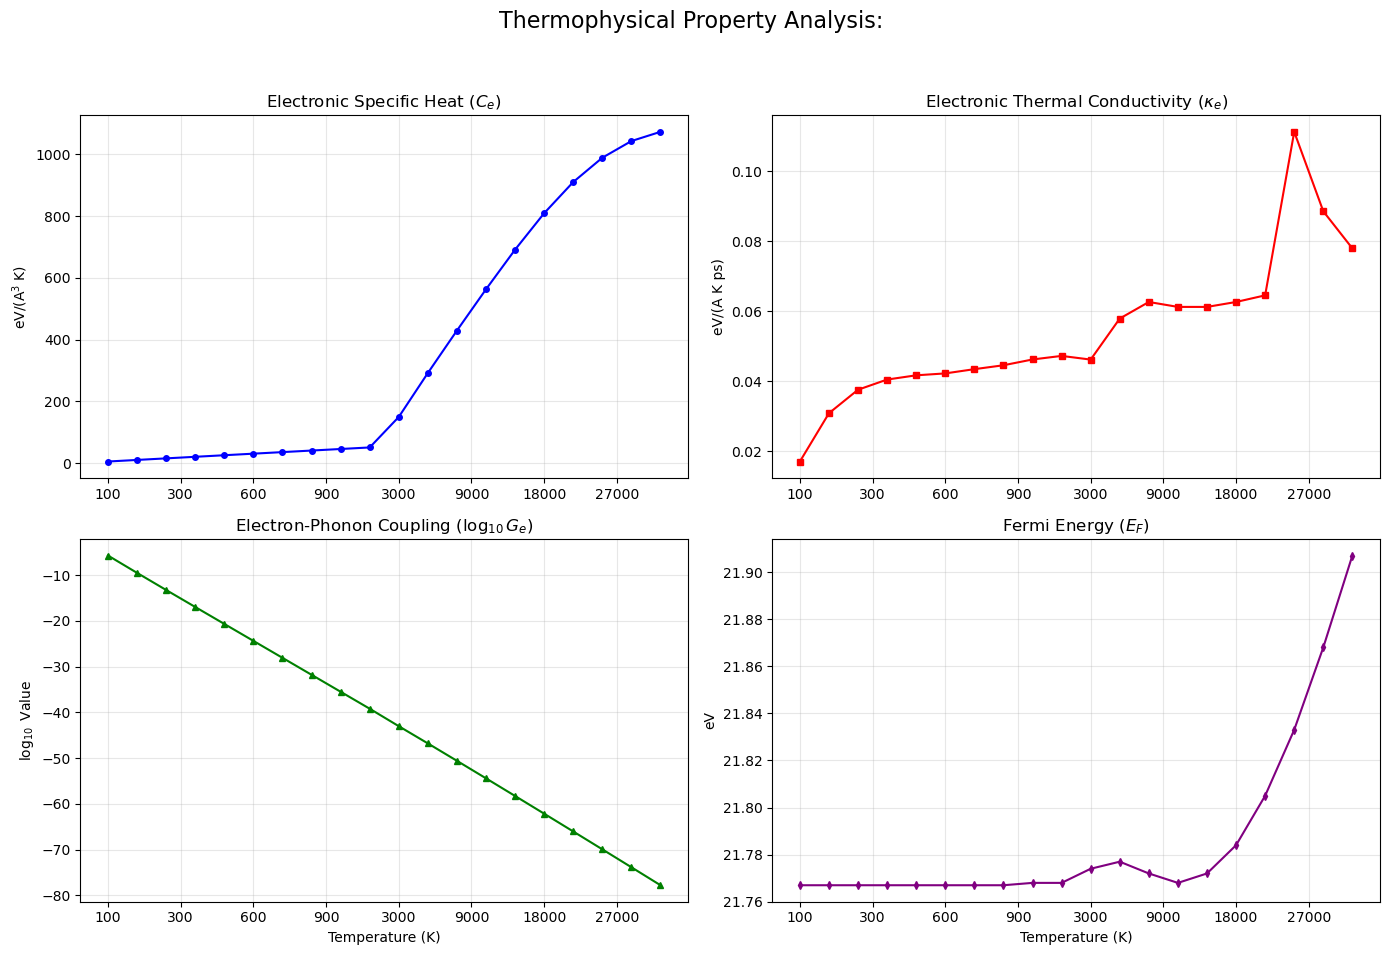

In [21]:

# Create a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Thermophysical Property Analysis: ', fontsize=16)

# 1. Electronic Specific Heat (C_e)
axes[0, 0].plot(df['T_e'], df['C_e'], color='blue', marker='o', markersize=4)
axes[0, 0].set_title('Electronic Specific Heat ($C_e$)')
axes[0, 0].set_ylabel('eV/(A$^3$ K)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].xaxis.set_major_locator(MaxNLocator(nbins=10))

# 2. Electronic Thermal Conductivity (k_e)
axes[0, 1].plot(df['T_e'], df['k_e'], color='red', marker='s', markersize=4)
axes[0, 1].set_title('Electronic Thermal Conductivity ($\kappa_e$)')
axes[0, 1].set_ylabel('eV/(A K ps)')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].xaxis.set_major_locator(MaxNLocator(nbins=10))

# 3. Electron-Phonon Coupling (Log10_Ge)
axes[1, 0].plot(df['T_e'], df['Log10_Ge'], color='green', marker='^', markersize=4)
axes[1, 0].set_title('Electron-Phonon Coupling ($\log_{10}G_e$)')
axes[1, 0].set_ylabel('$\log_{10}$ Value')
axes[1, 0].set_xlabel('Temperature (K)')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].xaxis.set_major_locator(MaxNLocator(nbins=10))

# 4. Fermi Energy (E_F)
# Convert E_F to numeric and drop any rows that fail (like unit headers)
df['E_F'] = pd.to_numeric(df['E_F'], errors='coerce')
df = df.dropna(subset=['E_F'])
axes[1, 1].plot(df['T_e'], df['E_F'], color='purple', marker='d', markersize=4)
axes[1, 1].set_title('Fermi Energy ($E_F$)')
axes[1, 1].set_ylabel('eV')
axes[1, 1].set_xlabel('Temperature (K)')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].xaxis.set_major_locator(MaxNLocator(nbins=10))

# Adjust layout so labels don't overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()